In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS

In [3]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [4]:
from sklearn.model_selection import train_test_split as tts

In [5]:
def DoKFold(model,X,y,k,random_state=146,scaler=None):
    '''Function will perform K-fold validation and return a list of K training and testing scores, inclduing R^2 as well as MSE.
    
        Inputs:
            model: An sklearn model with defined 'fit' and 'score' methods
            X: An N by p array containing the features of the model.  The N rows are observations, and the p columns are features.
            y: An array of length N containing the target of the model
            k: The number of folds to split the data into for K-fold validation
            random_state: used when splitting the data into the K folds (default=146)
            scaler: An sklearn feature scaler.  If none is passed, no feature scaling will be performed
        Outputs:
            train_scores: A list of length K containing the training scores
            test_scores: A list of length K containing the testing scores
            train_mse: A list of length K containing the MSE on training data
            test_mse: A list of length K containing the MSE on testing data
    '''
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=k,shuffle=True,random_state=random_state)
    
    train_scores=[]
    test_scores=[]
    train_mse=[]
    test_mse=[]
    
    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain,:]
        Xtest = X[idxTest,:]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)
        
        model.fit(Xtrain,ytrain)
        
        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
        # Compute the mean squared errors
        ytrain_pred = model.predict(Xtrain)
        ytest_pred = model.predict(Xtest)
        train_mse.append(np.mean((ytrain-ytrain_pred)**2))
        test_mse.append(np.mean((ytest-ytest_pred)**2))
        
    return train_scores,test_scores,train_mse,test_mse

In [6]:
red = pd.read_csv('./data/winequality-red.csv',sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
quality = red['quality']
data = red.drop(columns = 'quality')

ss = SS()
data = ss.fit_transform(data)
data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [8]:
# Create a train/test split of the data
Xtrain,Xtest,ytrain,ytest = tts(data, quality, test_size=0.4, random_state=146)

# K Nearest Neighbors

In [9]:
k_range = np.arange(5,51)

# Keep track of the overall accuracy
train=[]
test=[]

for k in k_range:
    knn = KNN(n_neighbors=k)
    
    knn.fit(Xtrain, ytrain)
    
    train.append(knn.score(Xtrain,ytrain))
    test.append(knn.score(Xtest,ytest))

In [10]:
idx = np.argmax(test)
print('Optimal k value (unweighted): ' + str(k_range[idx]))
print('score: ', np.max(test))

Optimal k value (unweighted): 8
score:  0.5765625


In [11]:
k_range = np.arange(5,51)

# Keep track of the overall accuracy
train=[]
test=[]

for k in k_range:
    knn = KNN(n_neighbors=k, weights='distance')
    
    knn.fit(Xtrain, ytrain)
    
    train.append(knn.score(Xtrain,ytrain))
    test.append(knn.score(Xtest,ytest))

In [12]:
idx = np.argmax(test)
print('Optimal k value (weighted): ' + str(k_range[idx]))
print('score: ', np.max(test))

Optimal k value (weighted): 11
score:  0.65


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression as LR

In [14]:
log_reg = LR(max_iter=100000)
log_reg.fit(Xtrain, ytrain)
log_reg.score(Xtest,ytest)

0.5671875

# Random Forest Classifier and Reggressor 

In [15]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [92]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [93]:
n_trees_range = [10,100,500,1000]

train=[]
test=[]

for n_trees in n_trees_range:
    rfr = RFC(random_state=146, n_estimators=n_trees)
    rfr.fit(Xtrain, ytrain)
    
    train.append(rfr.score(Xtrain,ytrain))
    test.append(rfr.score(Xtest,ytest))

ValueError: Unknown label type: 'continuous'

In [17]:
idx = np.argmax(test)
print('Optimal tree num: ' + str(n_trees_range[idx]))
print('score: ', np.max(test))

Optimal tree num: 500
score:  0.4930291693678513


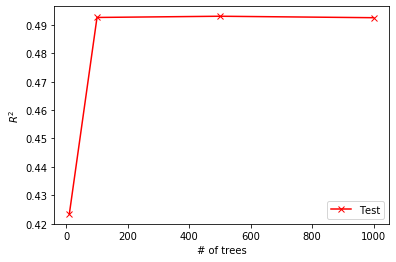

In [18]:
plt.plot(n_trees_range, test, '-xr', label='Test')
plt.xlabel('# of trees')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

In [19]:
#test min samples range
min_sample_range = np.arange(2,11)

train=[]
test=[]

for sample in min_sample_range:
    rfr = RFR(random_state=146, n_estimators=100, min_samples_split=sample)
    rfr.fit(Xtrain, ytrain)
    
    train.append(rfr.score(Xtrain,ytrain))
    test.append(rfr.score(Xtest,ytest))

In [20]:
idx = np.argmax(test)
print('Optimal min sample: ' + str(min_sample_range[idx]))
print('score: ', np.max(test))

Optimal min sample: 2
score:  0.4926027616341334


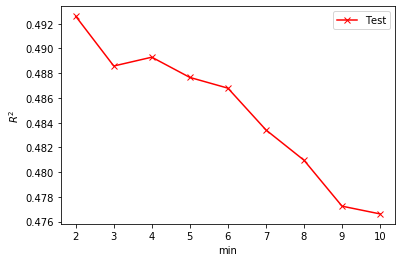

In [21]:
plt.plot(min_sample_range, test, '-xr', label='Test')
plt.xlabel('min')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

In [22]:
#logistic regression with kFold
log_reg = LR(max_iter=100000)
train,test,train_mse,test_mse = DoKFold(log_reg,data,quality,20)
print('log reg r^2 test:',np.mean(test))
print('log reg forest mse test:',np.mean(test_mse))

log reg r^2 test: 0.5960363924050632
log reg forest mse test: 0.5146123417721519


In [23]:
#knn with kfold
knn = KNN(n_neighbors=11, weights='distance')
train,test,train_mse,test_mse = DoKFold(knn,data,quality,20)
print('knn r^2 test:',np.mean(test))
print('knn mse test:',np.mean(test_mse))

knn r^2 test: 0.6929746835443038
knn forest mse test: 0.43140031645569615


In [24]:
#random forest with kFold
rfr = RFR(n_estimators=100, min_samples_split=2,random_state=146)
train,test,train_mse,test_mse = DoKFold(rfr,data,quality,20)
print('random forest r^2 test:',np.mean(test))
print('random forest mse test:',np.mean(test_mse))

random forest r^2 test: 0.5012312439418241
random forest mse test: 0.3195084042721518


In [50]:
ccp = pd.read_csv('./data/ccp.csv')
ccp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [51]:
target = ccp['PE']
ccp = ccp.drop(columns = 'PE')

ss = SS()
ccp = ss.fit_transform(ccp)
#ccp

In [57]:
Xtrain,Xtest,ytrain,ytest = tts(ccp, target, test_size=0.4, random_state=146)

# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor as DTR
rng_depth = np.arange(2,21)

train = []
test = []
train_mse = []
test_mse = []

for d in rng_depth:
    rfr = DTR(random_state=146, max_depth=d)
    rfr.fit(Xtrain, ytrain)
    
    train.append(rfr.score(Xtrain,ytrain))
    test.append(rfr.score(Xtest,ytest))
    
    ytrain_pred = rfr.predict(Xtrain)
    ytest_pred = rfr.predict(Xtest)
    train_mse.append((np.mean((ytrain-ytrain_pred)**2)))
    test_mse.append((np.mean((ytest-ytest_pred)**2)))

In [67]:
idx = np.argmin(test_mse)
idx2 = np.argmin(train_mse)
idx3 = np.argmax(test)
print('Optimal depth using test mse: ' + str(rng_depth[idx]))
print('Optimal depth using train mse: ' + str(rng_depth[idx2]))
print('Optimal depth using score: ' + str(rng_depth[idx3]))
print('score: ', np.max(test))

Optimal depth using test mse: 7
Optimal depth using train mse: 20
Optimal depth using score: 7
score:  0.9381621992011789


In [70]:
rng_depth = np.arange(2,21)
rng_samples = np.arange(2,11)
k = 5

results = []

# Keep track of how long this takes
for d in rng_depth:
    for s in rng_samples:
        settings = [d,s]
        rfr = DTR(random_state=146, max_depth = d, min_samples_split=s)
        rfr.fit(Xtrain, ytrain)
        tr = rfr.score(Xtrain,ytrain)
        te = rfr.score(Xtest,ytest)
        ytrain_pred = rfr.predict(Xtrain)
        ytest_pred = rfr.predict(Xtest)
        tr_mse = (np.mean((ytrain-ytrain_pred)**2))
        te_mse = (np.mean((ytest-ytest_pred)**2))
        results.append([*settings,tr,te,tr_mse,te_mse])

In [88]:
mean_test_mse = [np.mean(r[5]) for r in results]
min_mse = min(mean_test_mse)
idx = np.where(mean_test_mse == min_mse)
best_results_mse = results[idx[0][0]]
best_results_mse

[7,
 4,
 0.9541359230179247,
 0.9398554719120891,
 13.352930452866614,
 17.521461097095]

In [89]:
mean_test_r = [np.mean(r[3]) for r in results]
min_r = min(mean_test_r)
idx = np.where(mean_test_r == min_r)
best_results_r = results[idx[0][0]]
best_results_r

[2,
 2,
 0.8630846112309802,
 0.8588013181839861,
 39.86173459621641,
 41.13436897840854]

In [90]:
print('best mse settings:',best_results_mse)
print('best score settings:',best_results_r)

best mse settings: [7, 4, 0.9541359230179247, 0.9398554719120891, 13.352930452866614, 17.521461097095]
best score settings: [2, 2, 0.8630846112309802, 0.8588013181839861, 39.86173459621641, 41.13436897840854]


In [94]:
n_trees_range = [10,50,100,500]

train=[]
test=[]
train_mse = []
test_mse = []

for n_trees in n_trees_range:
    rfr = RFR(random_state=146, n_estimators=n_trees)
    rfr.fit(Xtrain, ytrain)
    
    train.append(rfr.score(Xtrain,ytrain))
    test.append(rfr.score(Xtest,ytest))
    
    ytrain_pred = rfr.predict(Xtrain)
    ytest_pred = rfr.predict(Xtest)
    train_mse.append((np.mean((ytrain-ytrain_pred)**2)))
    test_mse.append((np.mean((ytest-ytest_pred)**2)))

In [99]:
idx = np.argmin(test_mse)
print('Optimal trees using test mse: ' + str(n_trees_range[idx]))
print('score', np.min(test_mse))

Optimal trees using test mse: 500
score 12.0946105172974


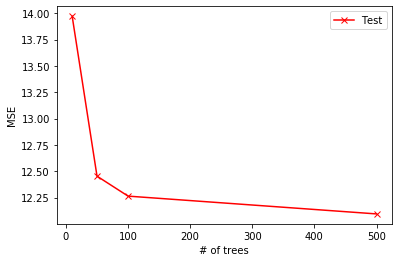

In [96]:
plt.plot(n_trees_range, test_mse, '-xr', label='Test')
plt.xlabel('# of trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [100]:
n_trees_range = [10,50,100,500]
rng_samples = np.arange(2,11)
k = 5

results = []

# Keep track of how long this takes
for t in n_trees_range:
    for s in rng_samples:
        settings = [t,s]
        rfr = RFR(random_state=146,n_estimators=t, min_samples_split=s)
        rfr.fit(Xtrain, ytrain)
        tr = rfr.score(Xtrain,ytrain)
        te = rfr.score(Xtest,ytest)
        ytrain_pred = rfr.predict(Xtrain)
        ytest_pred = rfr.predict(Xtest)
        tr_mse = (np.mean((ytrain-ytrain_pred)**2))
        te_mse = (np.mean((ytest-ytest_pred)**2))
        results.append([*settings,tr,te,tr_mse,te_mse])

In [101]:
mean_test_mse = [np.mean(r[5]) for r in results]
min_mse = min(mean_test_mse)
idx = np.where(mean_test_mse == min_mse)
best_results_mse = results[idx[0][0]]
best_results_mse

[500,
 3,
 0.9935577263499387,
 0.9585255429026182,
 1.8756124110209835,
 12.082447226000836]

In [102]:
print('best mse settings:',best_results_mse)

best mse settings: [500, 3, 0.9935577263499387, 0.9585255429026182, 1.8756124110209835, 12.082447226000836]


In [104]:
rfr = RFR(random_state=146, n_estimators=500, min_samples_split=3)
tr,te,tr_mse,te_mse = DoKFold(rfr,ccp,target,k=5)
print('score',np.mean(te))
print('mse', np.mean(te_mse))

score 0.9617560767149973
mse 11.13090020060281
